In [457]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas
import matplotlib.patheffects as path_effects
from scipy.stats import skew, kurtosis
import svgutils.compose as sc


In [ ]:
'''
20230105 - Is price action in Uniswap v3 a Geometric Brownian Motion?

Figure 1: Historical price comparing the 5, 30, 100 price
Figure 2: price step distribution per transaction for 5, 30, 100
Figure 3: Fit to Laplacian? Shifted Normal distribution?

'''

In [2]:
ls

ETH-USDC-100bps.csv               ETH-USDC-5bps.csv
ETH-USDC-30bps.csv                ResearchBites-20230105-GBM.ipynb


In [3]:
# ETH-USDC
fetch = False
if fetch:
    ETHUSDC100=pandas.read_gbq("SELECT DISTINCT * FROM `arcane-world-371019.First_sync.1` WHERE address='0x7bea39867e4169dbe237d55c8242a8f2fcdcc387' ORDER BY block_number, transaction_index", "arcane-world-371019")
    ETHUSDC100 = ETHUSDC100.sort_values('block_number')
    ETHUSDC100.to_csv('ETH-USDC-100bps.csv')

    ETHUSDC30=pandas.read_gbq("SELECT DISTINCT * FROM `arcane-world-371019.First_sync.1` WHERE address='0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8' ORDER BY block_number, transaction_index", "arcane-world-371019")
    ETHUSDC30 = ETHUSDC30.sort_values('block_number')
    ETHUSDC30.to_csv('ETH-USDC-30bps.csv')


    ETHUSDC5=pandas.read_gbq("SELECT DISTINCT * FROM `arcane-world-371019.First_sync.1` WHERE address='0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640' ORDER BY block_number, transaction_index", "arcane-world-371019")
    ETHUSDC5 = ETHUSDC5.sort_values('block_number')
    ETHUSDC5.to_csv('ETH-USDC-5bps.csv')
else:
    ETHUSDC100 = pandas.read_csv('ETH-USDC-100bps.csv')
    ETHUSDC100 = ETHUSDC100.sort_values(by = ['block_number', 'transaction_index'], ascending = [True, True])
    ETHUSDC30 = pandas.read_csv('ETH-USDC-30bps.csv')
    ETHUSDC30 = ETHUSDC30.sort_values(by = ['block_number', 'transaction_index'], ascending = [True, True])
    ETHUSDC5 = pandas.read_csv('ETH-USDC-5bps.csv')    
    ETHUSDC5 = ETHUSDC5.sort_values(by = ['block_number', 'transaction_index'], ascending = [True, True])

In [8]:
ticks100 = []
block100 = []

ticks30 = []
block30 = []

ticks5 = []
block5 = []


for index, row in ETHUSDC100.iterrows():
    ticks100.append(row['tick'])
    block100.append(row['block_number'])
    
ticks100 = np.array(ticks100)
block100 = np.array(block100)

for index, row in ETHUSDC30.iterrows():
    ticks30.append(row['tick'])
    block30.append(row['block_number'])
ticks30 = np.array(ticks30)
block30 = np.array(block30)

for index, row in ETHUSDC5.iterrows():
    ticks5.append(row['tick'])
    block5.append(row['block_number'])
ticks5 = np.array(ticks5)
block5 = np.array(block5)

'\nsc.Figure("1200px", "675px", \n    sc.Panel(sc.SVG("temp.svg")),\n    sc.Panel(sc.SVG("../../stylesheet/logo-bg.svg").scale(0.192))\n    ).save("UNI-dump.svg")\n'

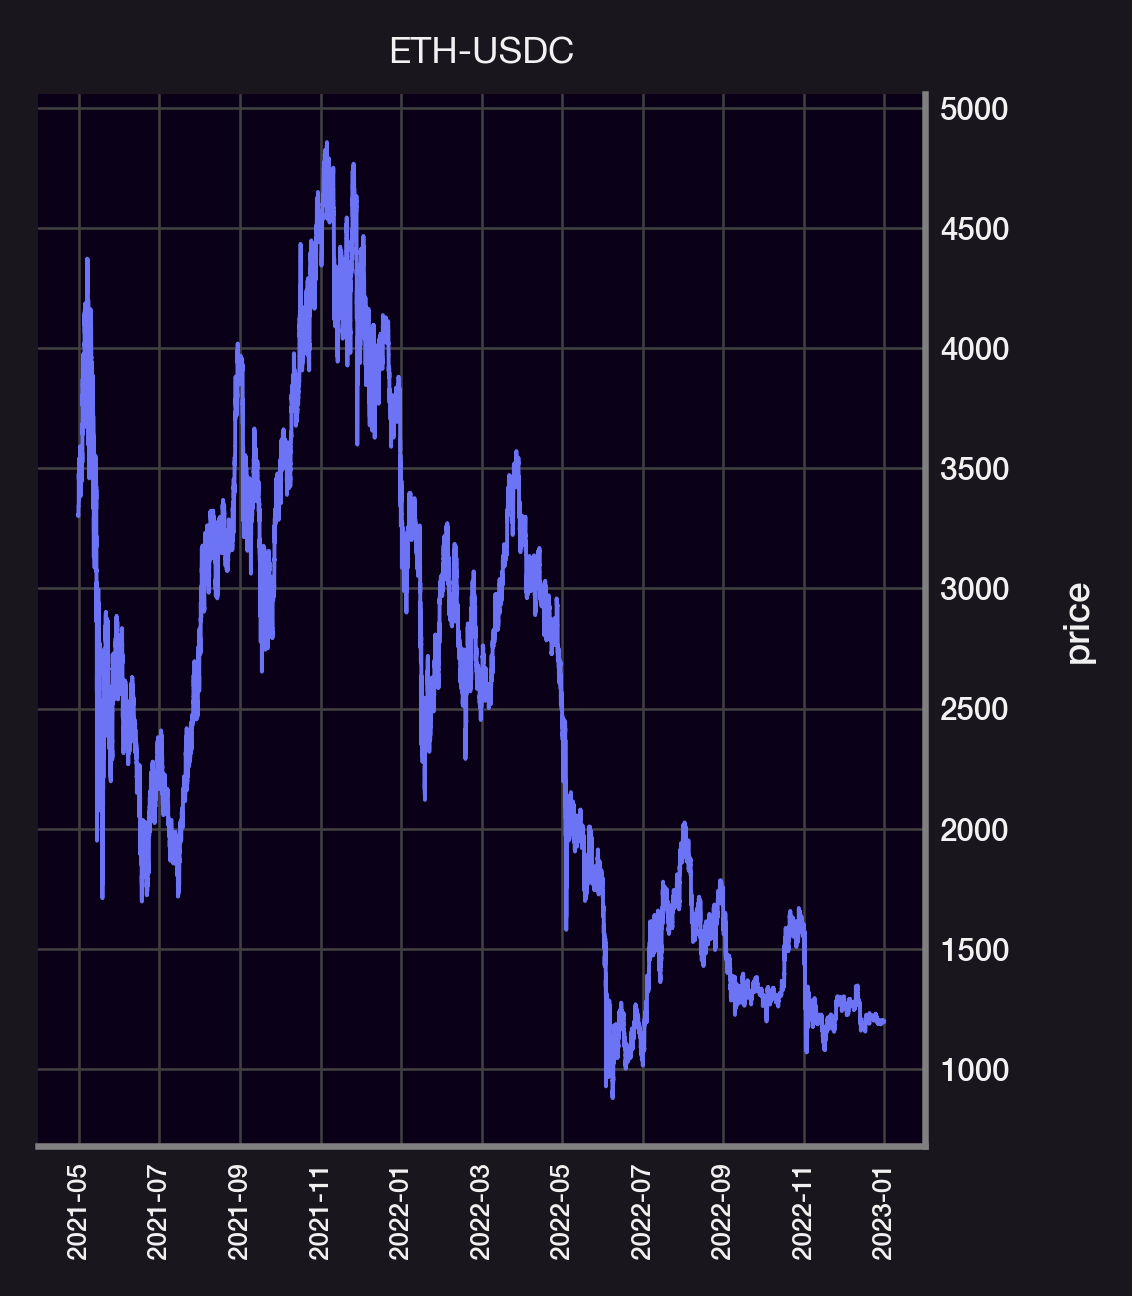

In [287]:
plt.style.use('../../stylesheet/panoptic-dark-7_8.mplstyle')
#plt.step(block5, 1.0001**(-ticks5)*10**12, where='post', label='5bps')
plt.step(block30, 1.0001**(-ticks30)*10**12, where='post', label='30bps')
#plt.step(block100, 1.0001**(-ticks100)*10**12, where='post', label='100bps')

plt.ylabel('price',labelpad=-203)
dates = []
for b in np.linspace(block5[0], block5[-1], 11).astype(int):
    d = ETHUSDC5.loc[ETHUSDC5['block_number'] == b]['block_timestamp']
    k = 0
    while len(d) == 0:
        k += 1
        d = ETHUSDC5.loc[ETHUSDC5['block_number'] == (b+k)]['block_timestamp']
    dates.append(list(d)[0].split(' ')[0][:-3])
plt.xticks(np.linspace(block5[0], block5[-1], 11).astype(int), dates, rotation=90, fontsize=5)
plt.title('ETH-USDC')
#plt.legend()

plt.savefig('ETH-Price-1.svg')
plt.savefig('ETH-Price-1.png')

'''
sc.Figure("1200px", "675px", 
    sc.Panel(sc.SVG("temp.svg")),
    sc.Panel(sc.SVG("../../stylesheet/logo-bg.svg").scale(0.192))
    ).save("UNI-dump.svg")
'''
#plt.xlim((15250000, 15252500))
#plt.ylim((1600, 1800))

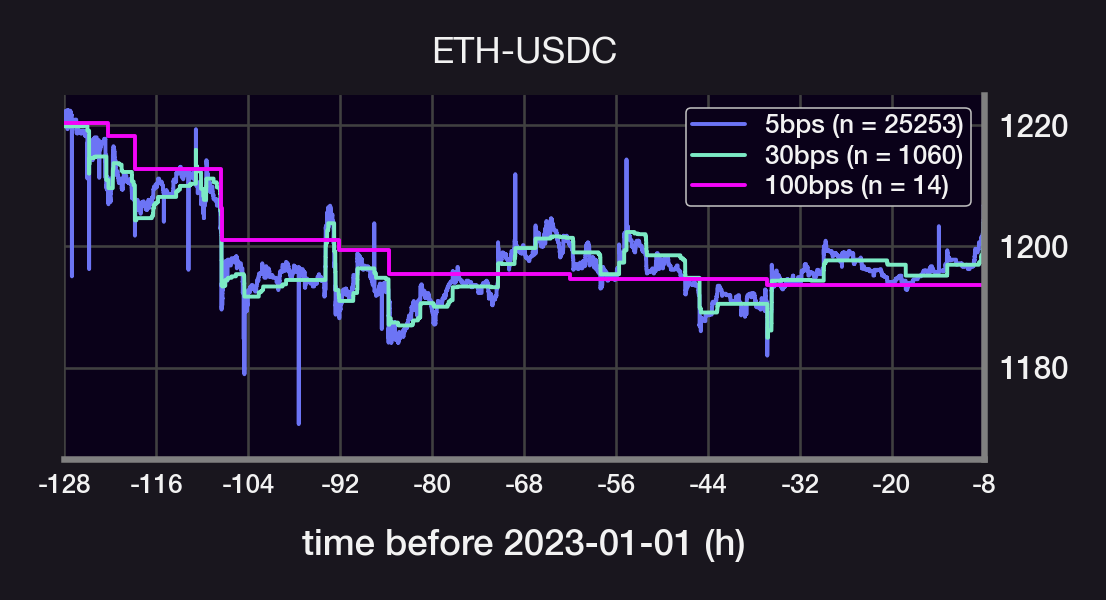

In [288]:
plt.style.use('../../stylesheet/panoptic-dark-4_7.mplstyle')

lowerBlock = 16305345-30000
upperBlock = 16305345

n5 = sum(block5 < upperBlock) - sum(block5 < lowerBlock)
n30 = sum(block30 < upperBlock) - sum(block30 < lowerBlock)
n100 = sum(block100 < upperBlock) - sum(block100 < lowerBlock)
         

plt.step(block5, 1.0001**(-ticks5)*10**12, where='post', label='5bps (n = '+str(n5)+')')
plt.step(block30, 1.0001**(-ticks30)*10**12, where='post', label='30bps (n = '+str(n30)+')')
plt.step(block100, 1.0001**(-ticks100)*10**12, where='post', label='100bps (n = '+str(n100)+')')
plt.title('ETH-USDC')


plt.xticks(np.linspace(lowerBlock, upperBlock, 11).astype(int), np.arange(-128, 0, 12), fontsize=5)

plt.xlabel('time before 2023-01-01 (h)')
#plt.ylabel('Price',labelpad=-203)
plt.legend()
plt.xlim((lowerBlock, upperBlock))
plt.ylim((1165, 1225))

plt.savefig('ETH-Price-2.svg')
plt.savefig('ETH-Price-2.png')

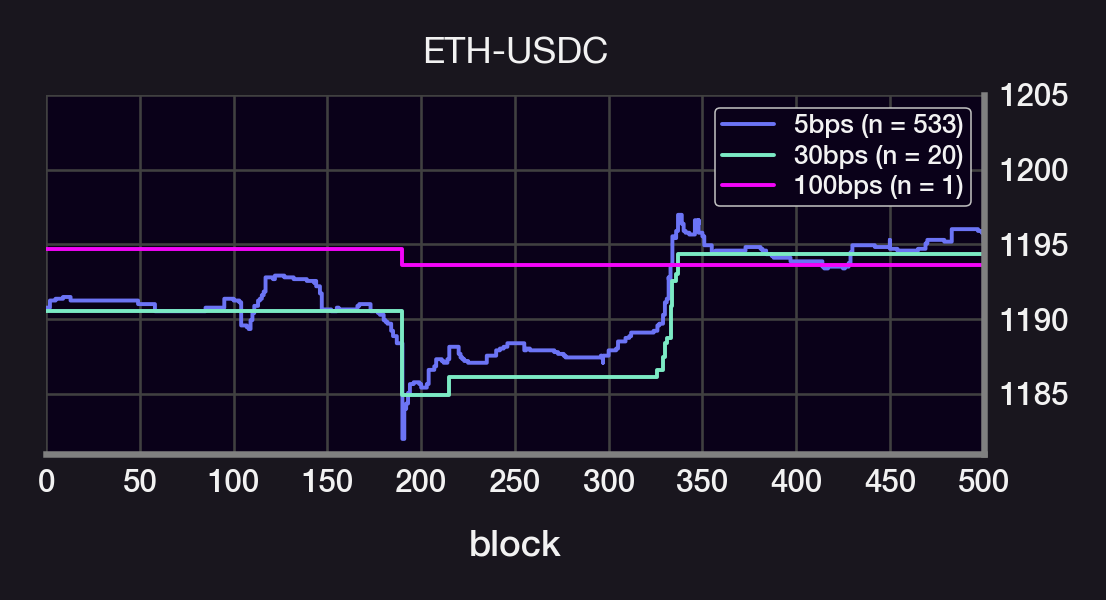

In [289]:
plt.style.use('../../stylesheet/panoptic-dark-4_7.mplstyle')

lowerBlock = 16305345-7250
upperBlock = 16305345-6750

n5 = sum(block5 < upperBlock) - sum(block5 < lowerBlock)
n30 = sum(block30 < upperBlock) - sum(block30 < lowerBlock)
n100 = sum(block100 < upperBlock) - sum(block100 < lowerBlock)


plt.step(block5, 1.0001**(-ticks5)*10**12, where='post', label='5bps (n = '+str(n5)+')')
plt.step(block30, 1.0001**(-ticks30)*10**12, where='post', label='30bps (n = '+str(n30)+')')
plt.step(block100, 1.0001**(-ticks100)*10**12, where='post', label='100bps (n = '+str(n100)+')')

plt.title('ETH-USDC')

plt.xticks(np.arange(lowerBlock, upperBlock+1, 50),np.arange(lowerBlock, upperBlock+1, 50)-lowerBlock)
plt.xlabel('block')

plt.legend()
plt.xlim((lowerBlock, upperBlock))
plt.ylim((1181, 1205))

plt.savefig('ETH-Price-3.svg')
plt.savefig('ETH-Price-3.png')

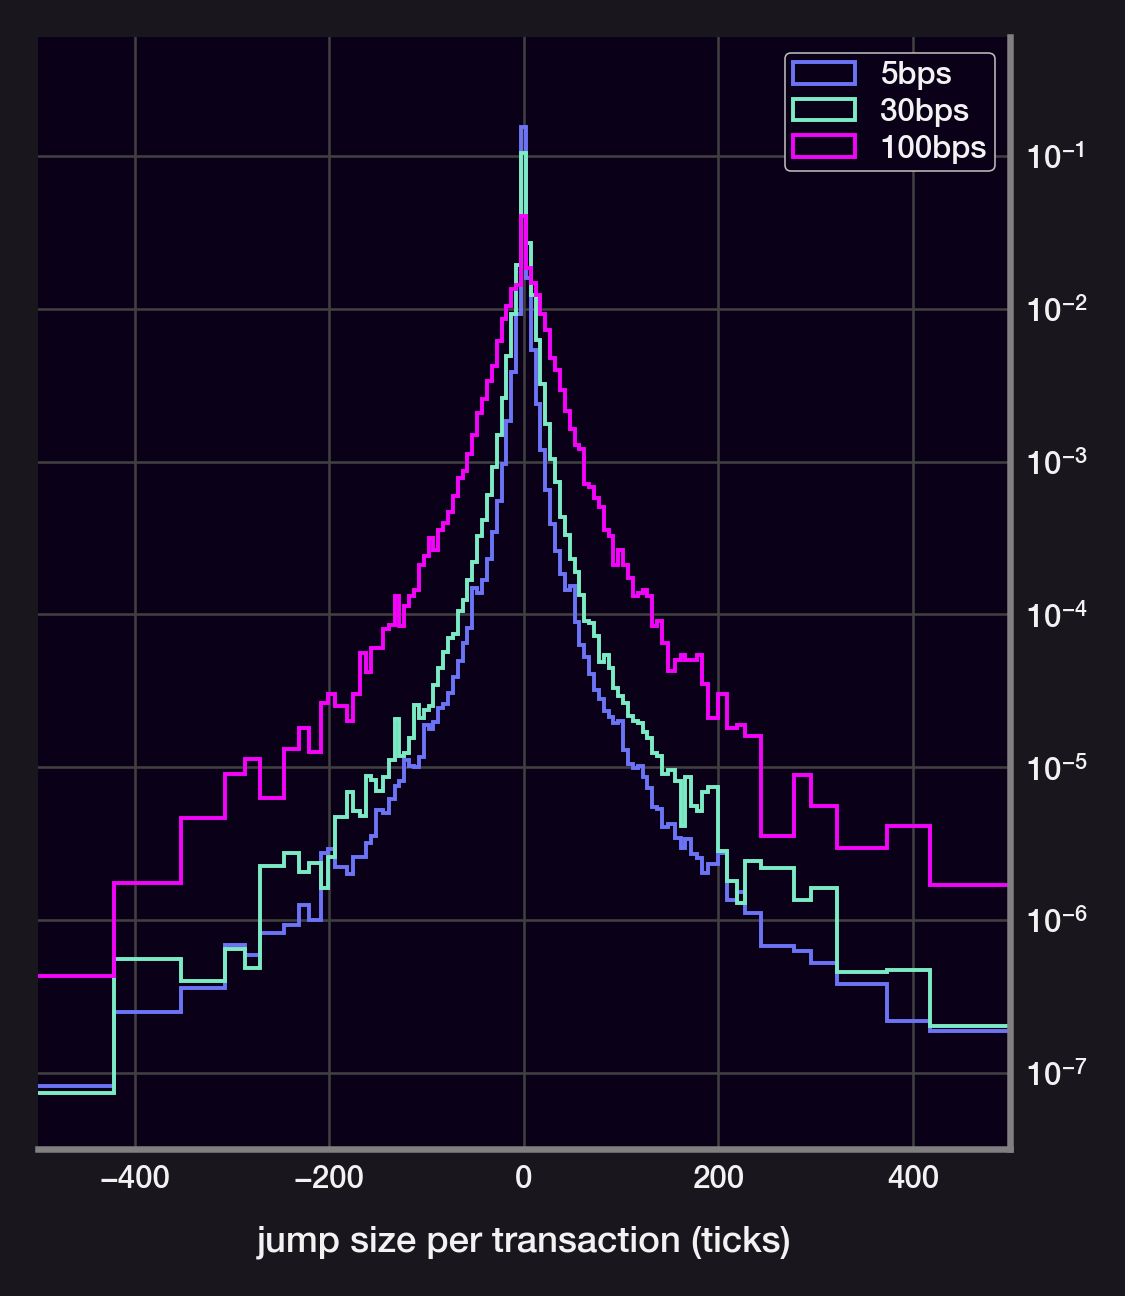

In [451]:
plt.style.use('../../stylesheet/panoptic-dark-7_8.mplstyle')

plt.hist(np.diff(ticks5), np.unique(np.diff(ticks100)).reshape(-1, 5).mean(1).astype(int), lw=0.75, density=True, histtype='step', label='5bps')
plt.hist(np.diff(ticks30), np.unique(np.diff(ticks100)).reshape(-1, 5).mean(1).astype(int), lw=0.75, density=True, histtype='step', label='30bps')
plt.hist(np.diff(ticks100), np.unique(np.diff(ticks100)).reshape(-1, 5).mean(1).astype(int), lw=0.75, density=True, histtype='step', label='100bps')

plt.xlabel('jump size per transaction (ticks)')
plt.legend()

plt.semilogy()
plt.xlim((-500, 500))
plt.ylim((10**-7.5, 0.6))
plt.savefig('ETH-dist-1.svg')
plt.savefig('ETH-dist-1.png')

means 0.002707319464997465 0.026043085590332214 0.3106501771027196
variances 144.4732715469564 274.3552353603412 4993.158554401068
skew 1.2814731830586485 33.087523085617626 -25.043558666854516
kurtosis 9044.75803123383 8008.234536589858 4904.765377948563


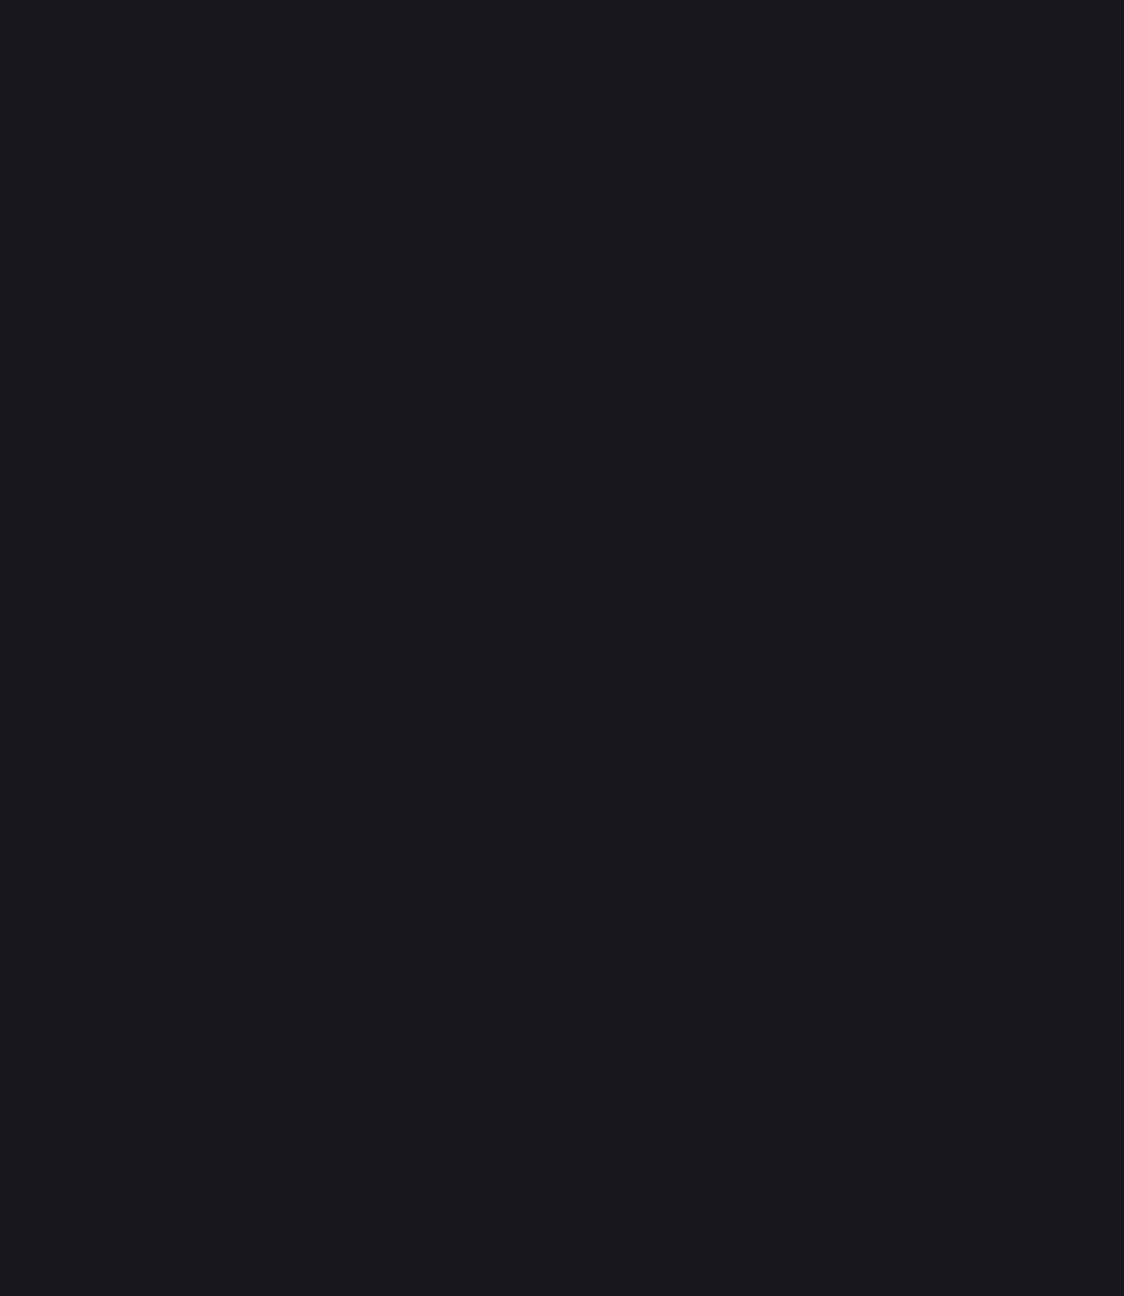

In [466]:
plt.style.use('../../stylesheet/panoptic-dark-7_8.mplstyle')
plt.axis('off')

print('means', np.mean(np.diff(ticks5)), np.mean(np.diff(ticks30)), np.mean(np.diff(ticks100)))
print('variances', np.var(np.diff(ticks5)), np.var(np.diff(ticks30)), np.var(np.diff(ticks100)))
print('skew', skew(np.diff(ticks5)), skew(np.diff(ticks30)), skew(np.diff(ticks100)))
print('kurtosis', kurtosis(np.diff(ticks5)), kurtosis(np.diff(ticks30)), kurtosis(np.diff(ticks100)))

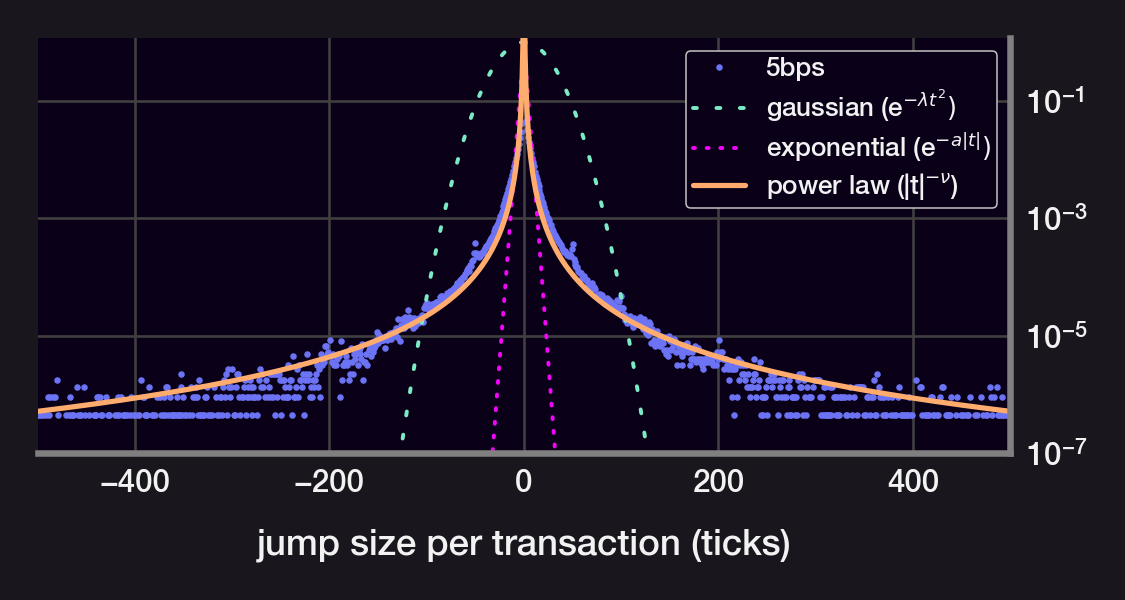

In [467]:
plt.style.use('../../stylesheet/panoptic-dark-16_9.mplstyle')

[x5, y5] = np.histogram(np.diff(ticks5), np.unique(np.diff(ticks5)))

plt.plot(y5[:-1], x5/x5.max(),'.', label='5bps')

t = np.linspace(np.unique(np.diff(ticks5))[0], np.unique(np.diff(ticks5))[-1], 10001)

plt.plot(t, np.exp(-t**2/1000), dashes=(1, 5), label='gaussian (e$^{-\lambda t^2})$')
plt.plot(t, np.exp(-abs(t)/2), dashes=(0.5,3), label='exponential (e$^{-a|t|})$')
plt.plot(t, 1/abs(t)**2.33, lw=1, label=r'power law (|t|$^{-\nu}$)')

plt.xlabel('jump size per transaction (ticks)')

plt.legend()

plt.semilogy()

plt.xlim((-500, 500))
plt.ylim((10**(-7), 1.2))
plt.savefig('ETH-fit-1.svg')
plt.savefig('ETH-fit-1.png')


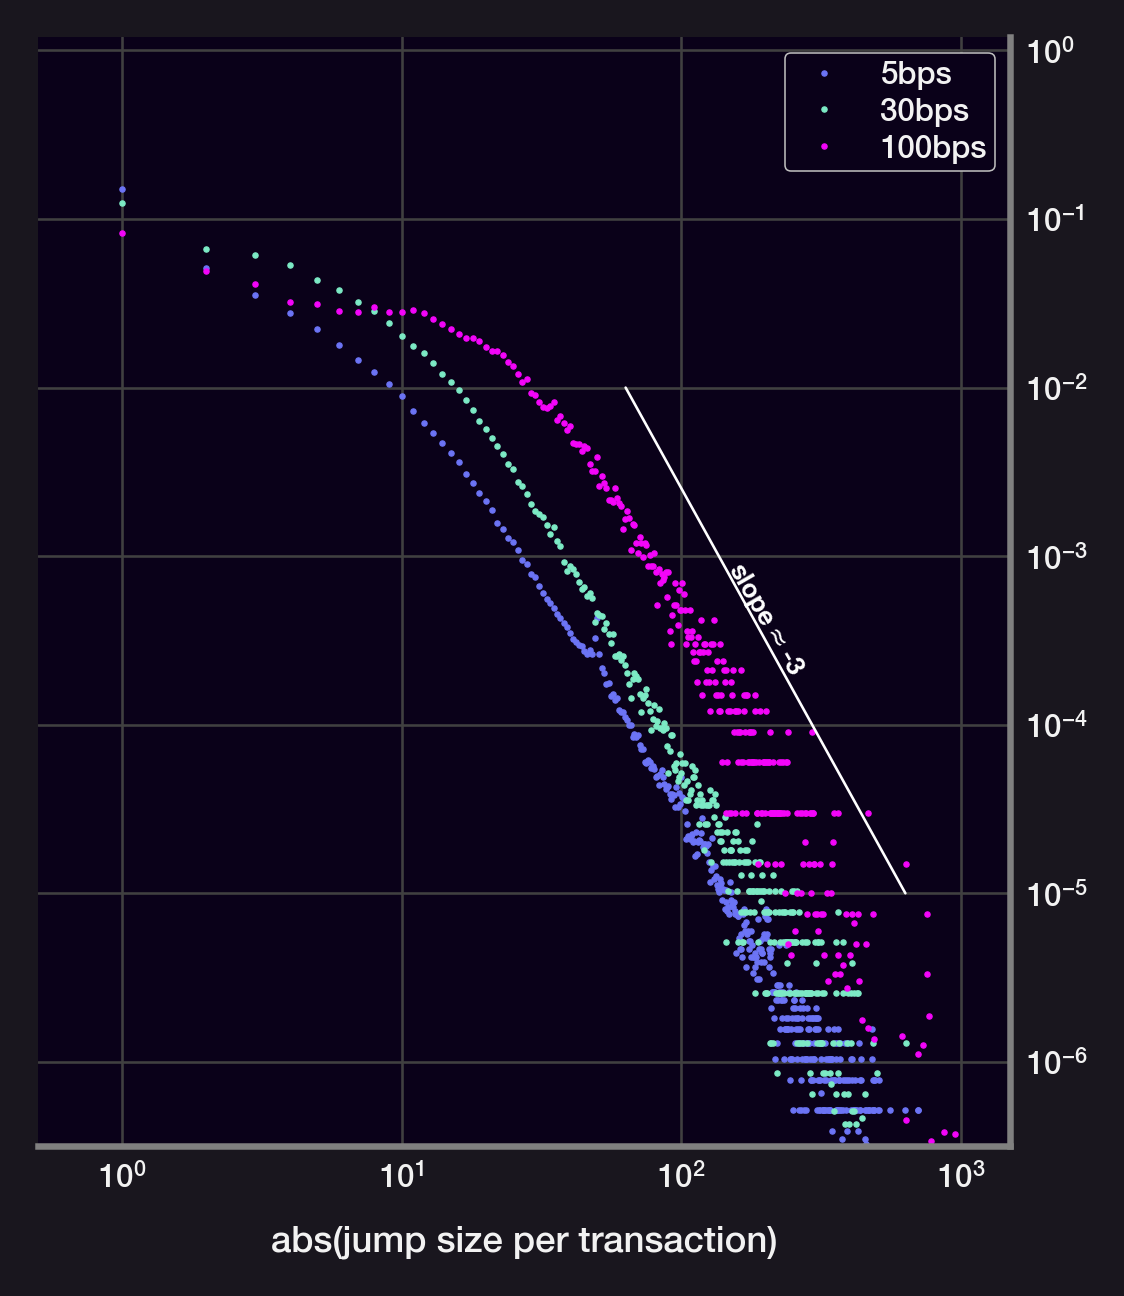

In [521]:


plt.style.use('../../stylesheet/panoptic-dark-7_8.mplstyle')

[x5, y5] = np.histogram(abs(np.diff(ticks5)), np.unique(abs(np.diff(ticks5))), density=True)
plt.plot(y5[:-1], x5,'.', label='5bps')

[x30, y30] = np.histogram(abs(np.diff(ticks30)), np.unique(abs(np.diff(ticks30))), density=True)
plt.plot(y30[:-1], x30,'.', label='30bps')

[x100, y100] = np.histogram(abs(np.diff(ticks100)), np.unique(abs(np.diff(ticks100))), density=True)
plt.plot(y100[:-1], x100,'.', label='100bps')

#t = np.linspace(np.unique(np.diff(ticks5))[0], np.unique(np.diff(ticks5))[-1], 10001)


#plt.plot(t, 1/abs(t)**2.3333, label=r'p(t) = |t|$^{-\nu}$')

plt.xlabel('abs(jump size per transaction)')

plt.legend()

plt.loglog()

plt.plot(2*np.array([10**2.5, 10**1.5]), [0.00001, 0.01], lw=0.5, color='#ffffff')

plt.text(200, 0.0002, r'slope$\approx$-3', fontweight='bold', fontsize=5, ha='center', color='#ffffff', rotation=-60)
plt.xlim((0.5, 1500))
plt.ylim((10**(-6.5), 1.2))
plt.savefig('abs-size.png')

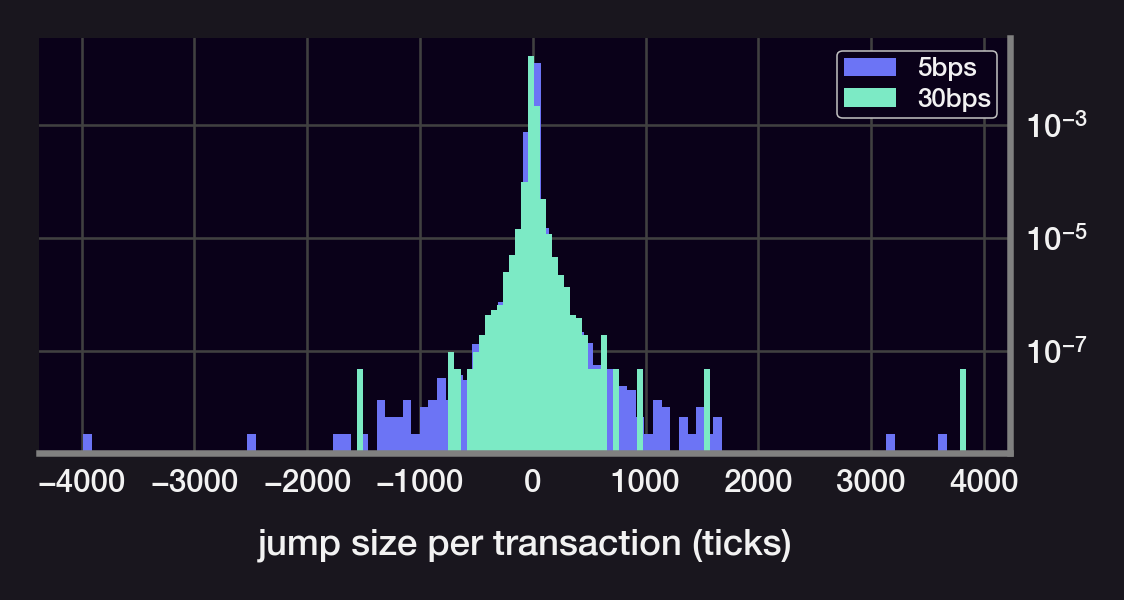

In [539]:
plt.style.use('../../stylesheet/panoptic-dark-16_9.mplstyle')

plt.hist(np.diff(ticks5), 100, lw=0.75, density=True,  label='5bps')
plt.hist(np.diff(ticks30), 100, lw=0.75, density=True, label='30bps')
#plt.hist(np.diff(ticks100), 100, lw=0.75, density=True, label='100bps')
plt.xlabel('jump size per transaction (ticks)')
plt.semilogy()
plt.legend()
plt.savefig('outlier-size.png')

In [29]:
list(ETHUSDC100.iloc[range(0, len(ETHUSDC100), 3000)]['block_number'])

[12369971,
 12541307,
 12723477,
 12973311,
 13343528,
 13704241,
 14266414,
 14756770,
 15013268,
 15260638,
 15594795,
 16116415]

In [336]:
np.unique(np.diff(ticks100)).reshape(-1, 5).mean(1).astype(int)

array([-2866,  -699,  -421,  -352,  -307,  -287,  -271,  -247,  -231,
        -221,  -209,  -201,  -194,  -182,  -176,  -169,  -162,  -157,
        -152,  -145,  -139,  -133,  -128,  -123,  -118,  -113,  -108,
        -103,   -98,   -93,   -88,   -83,   -78,   -73,   -68,   -63,
         -58,   -53,   -48,   -43,   -38,   -33,   -28,   -23,   -18,
         -13,    -8,    -3,     2,     7,    12,    17,    22,    27,
          32,    37,    42,    47,    52,    57,    62,    67,    72,
          77,    82,    87,    92,    97,   102,   107,   112,   117,
         122,   127,   132,   137,   142,   148,   155,   161,   166,
         172,   178,   183,   189,   199,   209,   219,   227,   244,
         278,   295,   322,   373,   417,   506,   725,  2871])

In [460]:
len(ETHUSDC5)/(len(ETHUSDC5) + len(ETHUSDC30) + len(ETHUSDC100))
                                                    
                                                

0.9010025321107454

In [544]:
(np.diff(ticks30)>3000).nonzero()[0]

array([257187])

In [644]:
plt.style.use('../../stylesheet/panoptic-dark-7_8.mplstyle')

[x5, y5] = np.histogram((np.diff(ticks5)), np.linspace(-4000, 4000, 100001), density=True)

df = np.cumsum(x5)/sum(x5)
dD = []
for i in range(1000000):
    xi = np.random.random()
    i = (df>=xi).nonzero()[0][0]
    #print(xi, i, y5[i])
    dD.append(y5[i])
    

[]

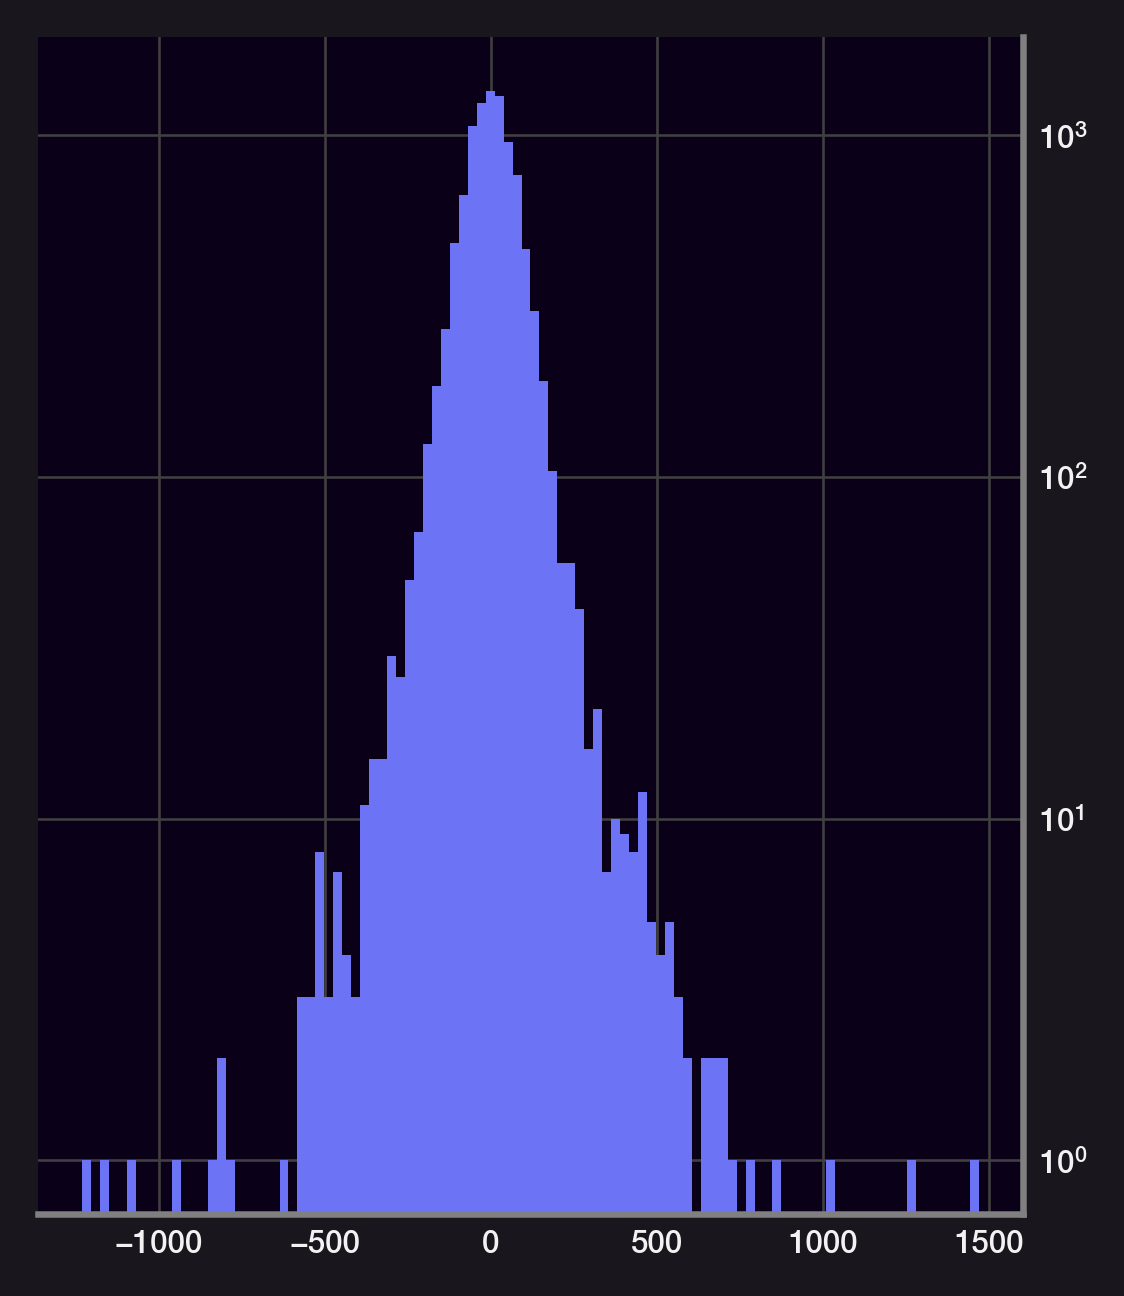

In [645]:
dArray = np.array(dD)
plt.hist(dArray.reshape(-1, 100).sum(1), 100)
plt.semilogy()